# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Inicialización](#inicializacion) 
* [Etapa 2. Cargar los datos](#cargar)
* [Etapa 3. Preparar los datos](#preparar)
    * [Visits](#visits)
     * [Corregir datos](#corregir_visits)
    * [Orders](#orders)
     * [Corregir datos](#corregir_orders)
    * [Costs](#costs)
     * [Corregir datos](#corregir_costs)
* [Etapa 4. Analizar los datos](#analizar)
    * [Producto](#producto)
     * [Conclusiones Producto](#conclu_productos)
    * [Ventas](#ventas)
     * [Conclusiones Ventas](#conclu_ventas)
    * [Marketing](#marketing)
     * [Conclusiones Marketing](#conclu_marketing)
* [Etapa 5. Conclusiones generales](#general)
* [Etapa 6. Recomendaciones](#recomendaciones)

# ¿Cómo optimizar los gastos de marketing? <a id='intro'></a>

Se te ha ido muy bien en el curso Practicum y te han ofrecido hacer prácticas en el
departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los
gastos de marketing.

Lo que vas a investigar:

- Cómo la gente usa el producto
- Cuándo empiezan a comprar
- Cuánto dinero trae cada cliente
- Cuándo pagan


Este proyecto tiene como propósito determinar cuanto dinero invertir en marketing y donde invertirlo, es decir, en que fuentes o plataformas, para así brindar las mejores recomendaciones al equipo de marketing de la compañía. La información con la que se cuenta para el estudio son los Registros del servidor con datos sobre las visitas a Y.Afisha desde junio de
2017 hasta mayo de 2018, un archivo de volcado con todos los pedidos del período y otro con las Estadísticas de gastos de marketing. Se van a tratar los valores ausentes, corregir los tipos de datos, hacer comprobaciones con los datos límpios, estudiar comportamientos de los usuarios para determinar:

- Cómo la gente usa el producto
- Cuándo empiezan a comprar
- Cuánto dinero trae cada cliente
- Cuándo pagan

Por último se van a escribir las conclusiones del estudio y a redactar las recomendaciones para el departamento de marketing de la compañía. 

## Inicialización <a id='inicializacion'></a>

In [1]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Cargar los datos <a id='cargar'></a>

In [2]:
visits= pd.read_csv('/datasets/visits_log_us.csv')
orders= pd.read_csv('/datasets/orders_log_us.csv')
costs= pd.read_csv('/datasets/costs_us.csv')

## Preparar los datos <a id='preparar'></a>

### Visits<a id='visits'></a>

In [3]:
# Información general/resumen sobre el DataFrame de visits

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Comprobar si hay duplicados

print(visits.duplicated().sum())
duplicated_visits= visits[visits.duplicated()]

0


In [5]:
# Muestra de los datos de visits

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
# Verificar distribución de Device

visits.groupby('Device')['Device'].describe()

,count,unique,top,freq
Device,,,,
desktop,262567,1,desktop,262567
touch,96833,1,touch,96833


In [7]:
#Verificar la distribución de Source Id

visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [8]:
# Verificar máximo y mínimo de End Ts  

print(visits['End Ts'].min())
print(visits['End Ts'].max())

2017-06-01 00:02:00
2018-06-01 01:26:00


In [9]:
# Verificar máximo y mínimo de Start Ts

print(visits['Start Ts'].min())
print(visits['Start Ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00


In [10]:
visits[visits['End Ts'] > '2018-06-01']

,Device,End Ts,Source Id,Start Ts,Uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


El dataset visits contiene los siguientes campos:

- `Devise` — dispositivo del usuario 
- `End Ts` — fecha y hora de término de la sesión        
- `Source Id`  — identificador de la fuente de anuncios de la que proviene el usuario     
- `Start Ts` — fecha y hora de inicio de la sesión       
- `Uid`  — identificador único del usuario  

Tenemos un conjunto de datos conformado por 5 columnas y 359400 filas, se necesita ajustar tipos de datos de las columnas End Ts y Start Ts, también se ajustarán los nombres de las columnas para que solo contengan letras minúsculas y quitar los espacios entre las palabras, el datasets no tiene valores ausentes, ni duplicados. 

En la columna Device tenemos dos tipos: desktop	 con 262567	inicios de sesión y touch con 96833. 

En la distribución de la columna Source Id podemos notar que hay 10 tipos, de los cuales la que está dando mejores resultados es la número 4 con 101794 entradas y las que están dando los resultados más deficientes son la número 6 con 6 entradas y la número 7 con 36 entradas. 

Verificando los máximos y mínimos de las columnas End Ts y Start Ts vemos que el rango de fechas de estos datos van desde 2017-06-01 hasta 2018-05-31 pero en la columna End Ts hay 11 visitas con fecha 2018-06-01 que corresponden a inicios de sesiones del día 2018-05-31 que terminaron luego de las 00:00:00 y una sesión que terminó exactamente a las 00:00:00, ya que esta información es relavante para la información se conservan todos los datos. 

### Corregir datos Visits<a id='corregir_visits'></a>

In [11]:
# Cambiar nombre de las columnas

visits.columns=['device','end_ts','source_id','start_ts','uid']

In [12]:
# cambiar tipos de datos

visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [13]:
# comprobar la tabla
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### Orders <a id='orders'></a>

In [14]:
# Información general/resumen sobre el DataFrame de orders

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
# Comprobar si hay duplicados

print(orders.duplicated().sum())
duplicated_orders= orders[orders.duplicated()]

0


In [16]:
# Muestra de los datos de orders

orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [17]:
# Verificar máximo y mínimo de Buy Ts  

print(orders['Buy Ts'].min())
print(orders['Buy Ts'].max())

2017-06-01 00:10:00
2018-06-01 00:02:00


In [18]:
orders[orders['Buy Ts'] > '2018-06-01']

,Buy Ts,Revenue,Uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


El dataset orders contiene los siguientes campos:

- `Buy Ts` — fecha y hora del pedido
- `Revenue` — Ingresos de Y.Afisha de este pedido        
- `Uid`  — identificador único del usuario que realiza un pedido     

Tenemos un conjunto de datos conformado por 3 columnas y 50415 filas, se necesita ajustar el tipo de datos de la columna Buy Ts, también se ajustarán los nombres de las columnas para que solo contengan letras minúsculas y quitar los espacios entre las palabras, el datasets no tiene valores ausentes ni duplicados.

Se verificó el rango de fechas de los datos calculando el máximo y mínimo de la columna Buy Ts y corresponden a las compras realizadas entre 2017-06-01 y el 2018-06-01, La compras realizada el 2018-06-01 corresponde a un inicio de sesión realizado el 2018-05-31 con Uid 83872787173869366, por lo tanto se conservan todos los datos.


### Corregir datos Orders <a id='corregir_orders'></a>

In [19]:
# Cambiar nombre de las columnas

orders.columns=['buy_ts','revenue','uid']

In [20]:
# cambiar tipos de datos

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Costs <a id='costs'></a>

In [21]:
# Información general/resumen sobre el DataFrame de costs

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [22]:
# Comprobar si hay duplicados

print(costs.duplicated().sum())
duplicated_costs= costs[costs.duplicated()]

0


In [23]:
# Muestra de los datos de costs

costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [24]:
#Verificar la distribución de Source Id

costs.groupby('source_id')['costs'].describe()


,count,mean,std,min,25%,50%,75%,max
source_id,,,,,,,,
1,363.0,57.391928,27.813968,5.80,36.2500,54.71,75.630,245.75
2,363.0,117.922975,53.971467,15.08,77.8550,115.97,149.160,507.09
3,363.0,389.315785,209.480437,39.26,226.4800,353.14,504.045,1788.28
4,363.0,168.246832,137.033287,0.83,59.5150,130.07,254.385,788.03
5,364.0,142.189835,65.289628,0.70,92.4975,137.30,180.350,719.22
9,363.0,15.199697,6.829491,1.85,9.7950,14.49,19.975,49.53
10,363.0,16.039917,9.440731,0.54,9.1500,14.67,21.495,68.11


In [25]:
# Verificar máximo y mínimo de dt 

print(costs['dt'].min())
print(costs['dt'].max())

2017-06-01
2018-05-31


El dataset costs contiene los siguientes campos:

- `source_id` — identificador de la fuente de anuncios
- `dt` — fecha        
- `costs`  — gastos en esta fuente de anuncios en este día     

Tenemos un conjunto de datos conformado por 3 columnas y 2542 filas, solo se necesita ajustar el tipo de datos de la columna dt, el datasets no tiene valores ausentes ni duplicados.

Se estudió la distribución de los costos en relación a source_id y vemos que el número de gastos en cada una de las fuentes es 363 solo la número 5 tiene 364, en cuanto a los gastos si hay grandes diferencias, la fuente número 3 fue en la que más se invirtió, mientras que en las 9 y 10 se invirtió muy poco con 14,49 y 14,67 respectivamente. Como la media es mayor que la mediana en todos los casos, podemos decir que los datos están sesgados a la derecha por lo que vamos a tomar la mediana para este y posteriores estudios.

Se verificó el rango de fechas de los datos calculando el máximo y mínimo de la columna dt y corresponden a los gastos realizadas entre 2017-06-01 y el 2018-05-31, lo cual es correcto.

### Corregir datos Costs <a id='corregir_costs'></a>

In [26]:
# cambiar tipos de datos

costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Analizar los datos <a id='analizar'></a>

### Producto <a id='producto'></a>

In [27]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [28]:
# Cantidad de personas que se conectan cada día, semana y mes

visits['session_year']= visits['start_ts'].dt.year
visits['session_month']= visits['start_ts'].astype('datetime64[M]')
visits['session_week']= visits['start_ts'].astype('datetime64[W]')
visits['session_date']= visits['start_ts'].dt.date

dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean() 
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean() 

print('DAU:', int(dau_total))
print('WAU:', int(wau_total))
print('MAU:', int(mau_total))


DAU: 907
WAU: 5621
MAU: 23228


Se puedo determinar que el número promedio de usuarios únicos diarios es de 907 (DAU), mientras que el número promedio de usuarios únicos semanales (WAU) fue de 5621 y el promedio mensual (MAU) fue de 23228, es decir la plataforma tiene ingresos constantes de usuarios únicos durante todo el mes. 

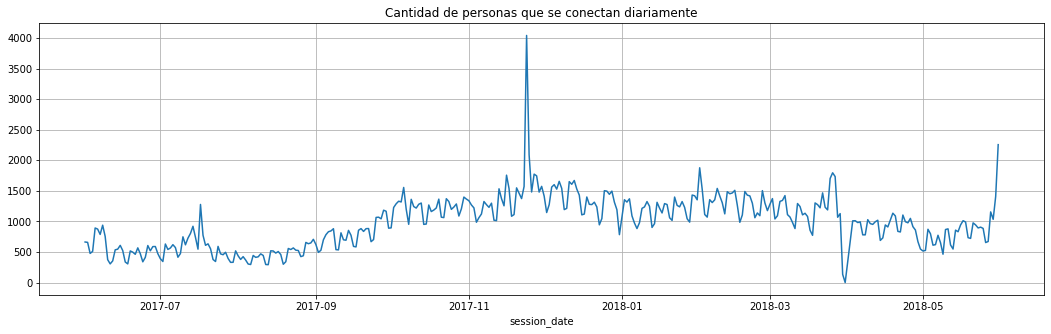

In [29]:
# session_date a lo largo del tiempo 

visits_date= visits.groupby('session_date')['uid'].count()
visits_date.plot(x='session_date', y='uid',
                title= 'Cantidad de personas que se conectan diariamente', grid=True,
                figsize=(18,5))
plt.show()

Se puede observar un incremento muy grande en los inicios de sesión en los días de fines de noviembre, una baja muy importante en los últimos días de marzo y el último día del mes de mayo aumentan los inicios de sesión.

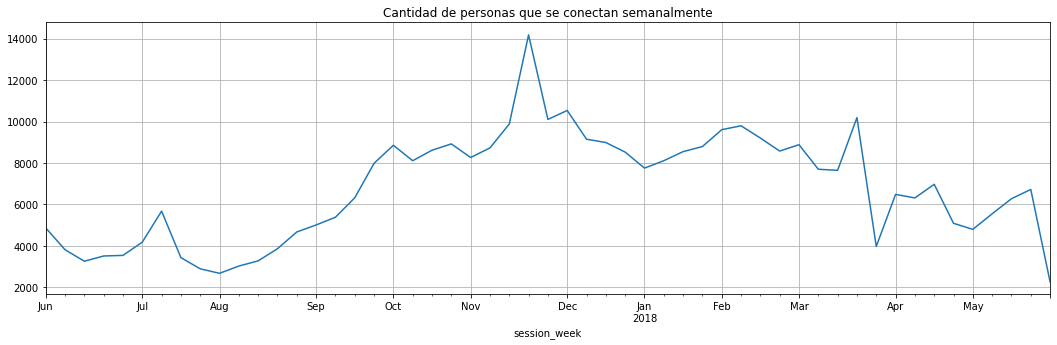

In [30]:
# session week a lo largo del tiempo

visits_week= visits.groupby('session_week')['uid'].count()
visits_week.plot(x='session_week', y='uid',
                title= 'Cantidad de personas que se conectan semanalmente', grid=True,
                figsize=(18,5))
plt.show()

Durante el mes de agosto los inicios de sesión empiezan a crecer durante todas las semanas y se puede ubicar el punto mas alto cerca de la tercera semana de junio, también una caída importante en la cuarta semana de marzo así como en la última semana de mayo.

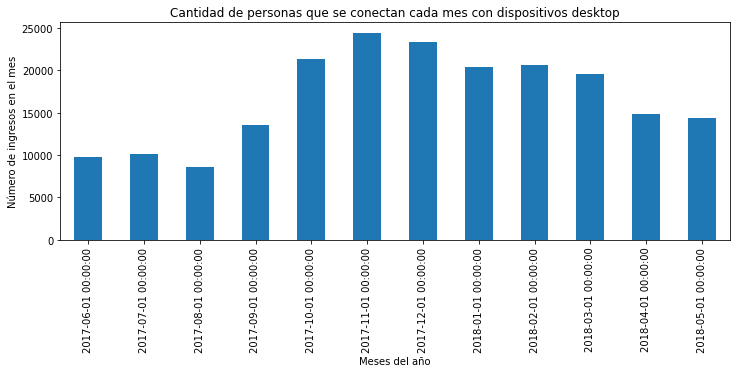

In [31]:
# Cuantas personas se conectan con cada dispositivo
subconjunto_device= visits.groupby(['device','session_month']).agg({'uid':'nunique'}).reset_index()
subconjunto_device_1= subconjunto_device[(subconjunto_device['device']=='desktop')]
subconjunto_device_desktop= subconjunto_device_1.groupby('session_month')['uid'].mean()
subconjunto_device_desktop.plot(kind='bar',title= 'Cantidad de personas que se conectan cada mes con dispositivos desktop',
                               figsize=(12,4))
plt.ylabel('Número de ingresos en el mes')
plt.xlabel('Meses del año')
plt.show()

Se pudo determinar que para los dispositivos desktop en los meses de Junio, Julio y agosto de 2017 las visitas fueron mas bajas en comparación con el resto de los meses del año, estuvieron por debajo de las 10000, a partir de septiembre de 2017 las visitas fueron en aumento hasta tocar su punto mas alto en noviembre de 2017 con casi 25000 inicios de sesión, a partir de ahí los valores fueron bajando hasta mayo de 2018 con unos 15000 inicios de sesión.

Se concluye que en los meses más calidos los ingresos a la plataforma disminuyen, mientras que en los meses más frios aumentan. 

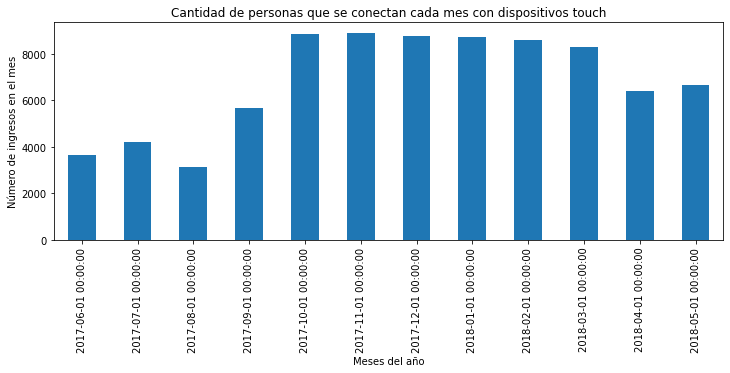

In [32]:
subconjunto_device_1= subconjunto_device[(subconjunto_device['device']=='touch')]
subconjunto_device_touch= subconjunto_device_1.groupby('session_month')['uid'].mean()
subconjunto_device_touch.plot(kind='bar',title= 'Cantidad de personas que se conectan cada mes con dispositivos touch',
                               figsize=(12,4))
plt.ylabel('Número de ingresos en el mes')
plt.xlabel('Meses del año')
plt.show()

Se pudo determinar que para los dispositivos touch que en los meses de Junio, Julio y agosto de 2017 las visitas fueron mas bajas en comparación con el resto de los meses del año, estuvieron cercanos a los 4000, a partir de septiembre de 2017 los valores comienzan a aumentar y a partir de octubre de 2017 suben drasticamente hasta llegar a más de 8000 visitas y se mantiene bastante estables muy cercanos a ese número hasta marzo de 2018, en abril y mayo de 2018 se ubica entre las 6000 y 7000 visitas.

Se concluye que en los meses más calidos los ingresos a la plataforma disminuyen, mientras que en los meses más frios aumentan.

In [33]:
# determinar cuántas sesiones hay por día

total_sessions_day = visits.groupby('session_date').agg({'uid':'count'}).mean()
print('La cantidad de sesiones promedio por día es de:', total_sessions_day[0])

La cantidad de sesiones promedio por día es de: 987.3626373626373


In [34]:
# Sesiones al día por usuario

total_sessions_day_uid_mean = visits.groupby(['session_date','uid']).agg({'uid':'ninique','uid':'count'}).mean()
print('Sesiones al día por usuario:', total_sessions_day_uid_mean[0])

Sesiones al día por usuario: 1.0874136559064957


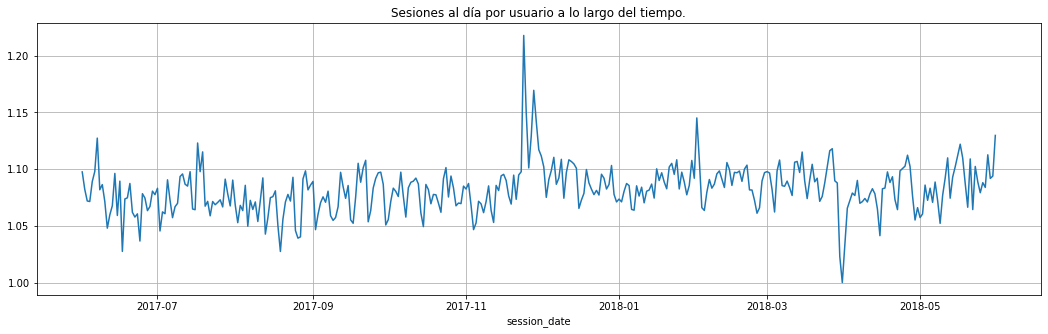

In [35]:
# Sesiones al día por usuario a lo largo del tiempo.

total_sessions_day_uid = visits.groupby(['session_date','uid']).agg({'uid':'count'})
total_sessions_day_uid.columns= ['n_sessions']
total_sessions_day_uid= total_sessions_day_uid.reset_index()
sub_sessions_day_uid= total_sessions_day_uid[['session_date','n_sessions']]
total=total_sessions_day_uid.groupby('session_date')['n_sessions'].mean()
total.plot(x='session_date', y='n_sessions',
                title= 'Sesiones al día por usuario a lo largo del tiempo.', grid=True,
                figsize=(18,5))
plt.show()

En la mayoría de los días los inicios de sesión por persona están en promedio entre 1.05 y 1.10, se observan algunos valores inusuales a finales de marzo de 2018 con un promedio que baja hasta 1 mientras que a finales de noviembre de 2017 hay una suba inusual por encima de 1.20 por persona. 

<AxesSubplot:>

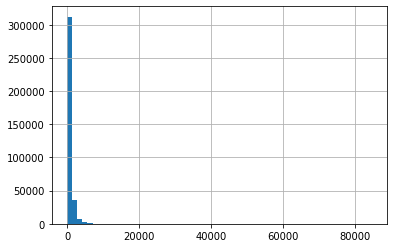

In [36]:
# determinar la duración de cada sesión en segundos (ASL)

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# verificar la distribución

visits['session_duration'].hist(bins=60)

Ya que la distribución de los datos no es normal se calculará la moda para determinar la duración promedio de la sesión.

In [37]:
 print('La duración promedio de una sesión es de:',visits['session_duration'].mode()[0])

La duración promedio de una sesión es de: 60


In [38]:
# determinar la frecuencia con la que los usuarios regresan 

sticky_wau= dau_total / wau_total * 100
sticky_mau= dau_total / mau_total * 100
print('El factor de adherencia semanal es de: '"%.3f%%" % sticky_wau)
print('El factor de adherencia mensual es de: '"%.3f%%" % sticky_mau)

El factor de adherencia semanal es de: 16.152%
El factor de adherencia mensual es de: 3.909%


<AxesSubplot:title={'center':'frecuencia con la que los usuarios regresan'}, xlabel='cohort_lifetime', ylabel='first_session_month'>

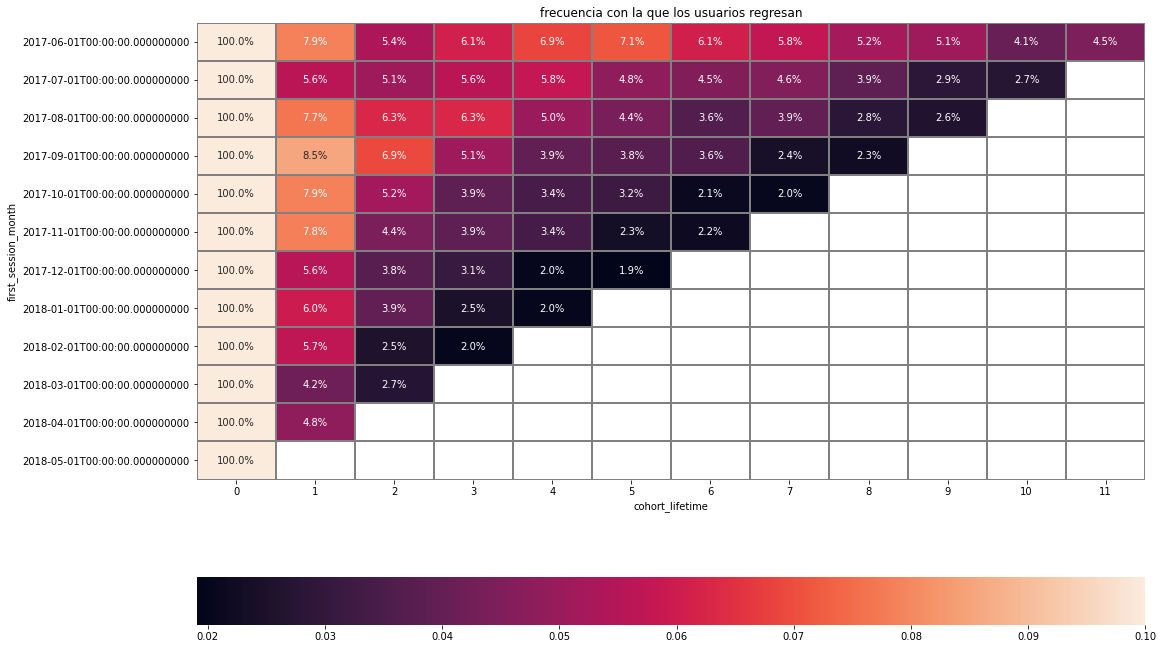

In [39]:
# determinar la frecuencia con la que los usuarios regresan 

first_session_date= visits.groupby(['uid'])['start_ts'].min()
first_session_date.name = 'first_session_month'

visits= visits.join(first_session_date, on='uid')
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_session_month'] = visits['first_session_month'].astype('datetime64[M]')


visits['cohort_lifetime'] = (
   visits['activity_month'] - visits['first_session_month']
)

visits['cohort_lifetime'] = ((visits['activity_month'] - visits['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')

cohorts= (
visits.groupby(['first_session_month','cohort_lifetime'])
    .agg({'uid':'nunique'})
    .reset_index()
)


initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0] [
    ['first_session_month','uid']
] 

initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
) 

cohorts = cohorts.merge(initial_users_count, on='first_session_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

retention_pivot = cohorts.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) # Compila una tabla dinámica 

plt.figure(figsize=(17, 12))
plt.title('frecuencia con la que los usuarios regresan')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
    vmax=0.1,
    cbar_kws= {'orientation': 'horizontal'},
) 

- La frecuencia con la que los usuarios regresan en el segundo mes de su ciclo de vida se encuentra entre 4.2% (Cohorte Marzo) y 8.5%(Cohorte septiembre)
- Todas las cohortes bajan su frecuencia a partir del tercer mes de su ciclo de vida.
- La cohorte de junio llega a su ultimo mes de su ciclo de vida con 4.5%, buenos números en comparación con las otras cohortes.

#### Conclusiones Producto <a id='conclu_producto'></a>

- Se determinó que la plataforma viene registrando ingresos constantes de usuarios únicos durante todo el mes, ya que al calcular número promedio de usuarios únicos diarios fue de 907 (DAU), mientras que el número promedio de usuarios únicos semanales (WAU) fue de 5621 y el promedio mensual (MAU) fue de 23228.
- Se puede observar un incremento muy grande en los inicios de sesión en los días de fines de noviembre, una baja muy importante en los últimos días de marzo y el último día del mes de mayo aumentan los inicios de sesión.
- Durante el mes de agosto los inicios de sesión empiezan a crecer durante todas las semanas y se puede ubicar el punto mas alto cerca de la tercera semana de junio, también una caída importante en la cuarta semana de marzo así como en la última semana de mayo.
- Algunas personas se conectan mas de una vez ya que el promedio diario de inicios de sesión es de 987, mientras que el promedio por persona es de 1.08.
- Se pudo determinar que para los dispositivos desktop en los meses de Junio, Julio y agosto de 2017 las visitas fueron mas bajas en comparación con el resto de los meses del año, estuvieron por debajo de las 10000, a partir de septiembre de 2017 las visitas fueron en aumento hasta tocar su punto mas alto en noviembre de 2017 con casi 25000 inicios de sesión, a partir de ahí los valores fueron bajando hasta mayo de 2018 con unos 15000 inicios de sesión. Se concluye que en los meses más calidos los ingresos a la plataforma disminuyen, mientras que en los meses más frios aumentan.  
- Se pudo determinar que para los dispositivos touch que en los meses de Junio, Julio y agosto de 2017 las visitas fueron mas bajas en comparación con el resto de los meses del año, estuvieron cercanos a los 4000, a partir de septiembre de 2017 los valores comienzan a aumentar y a partir de octubre de 2017 suben drasticamente hasta llegar a más de 8000 visitas y se mantiene bastante estables muy cercanos a ese número hasta marzo de 2018, en abril y mayo de 2018 se ubica entre las 6000 y 7000 visitas. Se concluye que en los meses más calidos los ingresos a la plataforma disminuyen, mientras que en los meses más frios aumentan.
- En la mayoría de los días los inicios de sesión por persona están en promedio entre 1.05 y 1.10, se observan algunos valores inusuales a finales de marzo de 2018 con un promedio que baja hasta 1 mientras que a finales de noviembre de 2017 hay una suba inusual por encima de 1.20 por persona. 
- Los mejores meses para la plataforma tomando en cuenta el dispositivo con el que ingresaron a la plataforma fueron Enero, febrero, marzo, octubre, noviembre y diciembre.
- La mayor cantidad de ingresos se obtuvieron a través de dispositivos desktop con más de 20000 ingresos en los mejores meses y casi 10000 en los meses de mas bajo movimiento.
- La duración promedio de una sesión es de 60 segundos. 
- La frecuencia con la que los usuarios regresan en el segundo mes de su ciclo de vida se encuentra entre 4.2% (Cohorte Marzo) y 8.5%(Cohorte septiembre)
- Todas las cohortes bajan su frecuencia a partir del tercer mes de su ciclo de vida.
- La cohorte de junio llega a su ultimo mes de su ciclo de vida con 4.5%, buenos números en comparación con las otras cohortes.

### Ventas <a id='ventas'></a>

In [40]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [41]:
# Cuándo empiezan a comprar

orders['order_month']= orders['buy_ts'].astype('datetime64[M]')

first_visits= visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visits.columns= ['uid', 'first_session_dt']


In [42]:
first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
#first_orders = orders.groupby(['uid','buy_ts']).agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid','first_order_td'] 

# Integración órdenes y visitas
buyers = pd.merge(first_visits, first_orders, on='uid')
#buyers['first_session_dt']= buyers['start_ts'].astype('datetime64[M]')
#buyers['first_order_td']= buyers['buy_ts'].astype('datetime64[M]')

buyers['days_to_first_purchase'] = ((buyers['first_order_td'] - buyers['first_session_dt']) / np.timedelta64(1,'D')).astype('int')


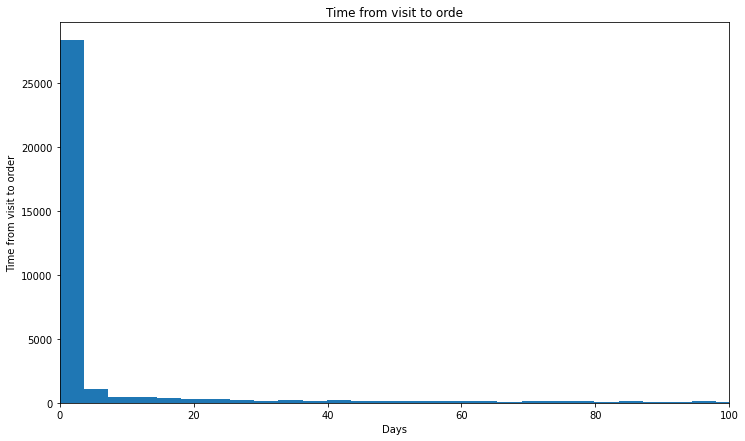

In [43]:
buyers['days_to_first_purchase'].plot(kind='hist',title= 'Time from visit to orde', bins=100,
                               figsize=(12,7))
plt.ylabel('Time from visit to order')
plt.xlabel('Days')
plt.xlim(0,100)
plt.show()

Podemos concluir que la gran mayoría de clientes realiza su primera compra el mismo día o en los primeros días que se registran en Y.Afisha y luego sus compras van disminuyendo drásticamente a lo largo del tiempo.

In [44]:
# Cuantas compras hacen los usuarios

buyers['first_session_dt']= buyers['first_session_dt'].astype('datetime64[M]')
buyers['first_order_td']= buyers['first_order_td'].astype('datetime64[M]')

cohort_sizes= buyers.groupby('first_order_td')

cohort_sizes= buyers.groupby('first_order_td').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns=['first_order_td','n_buyers']

In [45]:
orders= orders.merge(buyers, on='uid')
cohorts= orders.groupby(['first_order_td','order_month']).agg({'first_order_td':'count','order_month':'count'})
cohorts.columns= ['count_first_order_td','count_order_month']
cohorts= cohorts.reset_index()

In [46]:
cohorts['order_month'] = cohorts['order_month'].astype('datetime64[M]')
cohorts['first_order_td'] = cohorts['first_order_td'].astype('datetime64[M]')

cohorts['age_month']= ((cohorts['order_month'] - cohorts['first_order_td']) / np.timedelta64(1, 'M')).round().astype('int')


In [47]:
cohorts_report= cohort_sizes.merge(cohorts, on='first_order_td')

In [48]:
cohorts_report['orders_per_buyer']= cohorts_report['count_order_month'] / cohorts_report['n_buyers']

In [49]:
cohorts_report['first_order_td'].dt.strftime('%d.%m.%Y')
cohorts_report['first_order_td']= cohorts_report['first_order_td'].dt.strftime('%Y-%m')

<AxesSubplot:title={'center':'Compras por usuario'}, xlabel='age_month', ylabel='first_order_td'>

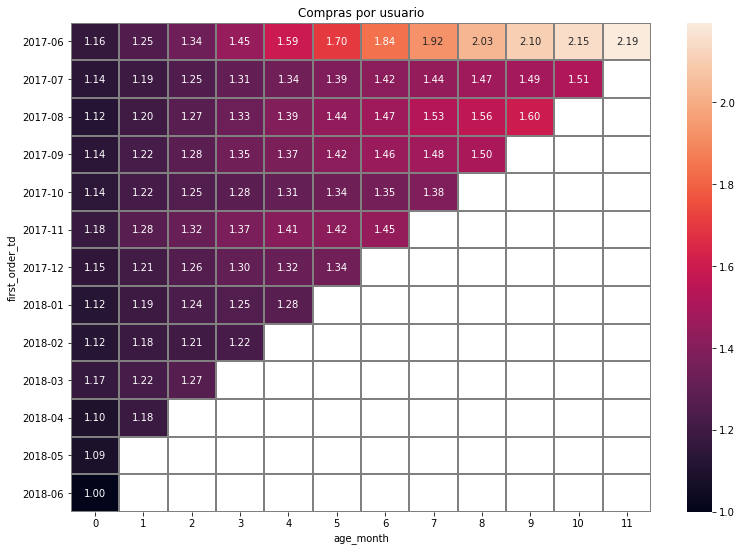

In [50]:
cohorts_ltv= cohorts_report.pivot_table(
    index= 'first_order_td',
    columns='age_month',
    values='orders_per_buyer',
    aggfunc='median'
).cumsum(axis=1)

cohorts_ltv.fillna('')

plt.figure(figsize=(13, 9))
plt.title('Compras por usuario')
sns.heatmap(
   cohorts_ltv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)


- En el ciclo de vida 0 las compras promedio por cliente van desde 1 a 1.18, siendo la mejor cohorte la de noviembre 2017 con 1.18.
- A partir del segundo mes las compras promedio crecen ligeramente y se mantienen así durante todo el ciclo de vida.
- La mejor cohorte es la del mes de junio 2017 que mantiene un crecimiento sostenido y mayor en compraración con las otras cohortes y llega a su último mes 2.19 acumulado.

In [51]:
# Tamaño promedio de las compras

order_data= orders.merge(first_orders, on='uid')

In [52]:
order_data= order_data.rename(columns={'first_order_td_x':'first_order_td'})

In [53]:
median_purchase = order_data.groupby(['first_order_td','order_month']).agg({'revenue': 'median'})
median_purchase= median_purchase.reset_index()

In [54]:
median_purchase['age_month']= (
    median_purchase['order_month'] - median_purchase['first_order_td']
) / np.timedelta64(1, 'M')

median_purchase['age_month'] = median_purchase['age_month'].round().astype('int')


In [55]:
median_purchase['first_order_td'].dt.strftime('%d.%m.%Y')
median_purchase['first_order_td']= median_purchase['first_order_td'].dt.strftime('%Y-%m')

<AxesSubplot:title={'center':'Tamaño promedio de compra'}, xlabel='age_month', ylabel='first_order_td'>

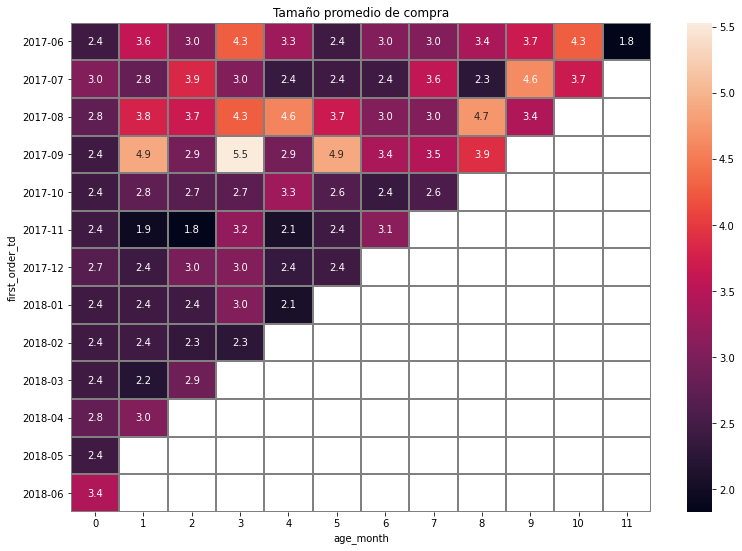

In [56]:
median_purchase_pivot= median_purchase.pivot_table(
    index='first_order_td',
    columns='age_month',
    values='revenue',
    aggfunc='median',
)

plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra')
sns.heatmap(
    median_purchase_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

- El tamaño promedio de la compra en el primer mes del ciclo de vida va desde 2.4 hasta 3.
- A partir del segundo mes las cohortes de Junio, Julio, Agosto y Septiembre de 2017 presentan aumentos en el tamaño promedio de la compra.
- Las cohortes de agosto y septiembre mantuvieron durante todo su ciclo de vida un tamaño promedio mayor a la de su primer mes.
- El tamaño promedio de compra mas alto se registró en la cohorte de septiembre a su cuarto mes.

In [57]:
# Cuanto dinero genera cada cliente (LTV) 

cohorts_revenue= orders.groupby(['first_order_td','order_month']).agg({'revenue':'sum'}).reset_index()

In [58]:
report= cohort_sizes.merge(cohorts_revenue, on='first_order_td')

In [59]:
report['age_month']= (
    report['order_month'] - report['first_order_td']
) / np.timedelta64(1,'M')
report['age_month']= report['age_month'].round().astype('int')

In [60]:
report['ltv']= report['revenue']/ report['n_buyers']

In [61]:
report['first_order_td'].dt.strftime('%d.%m.%Y')
report['first_order_td']= report['first_order_td'].dt.strftime('%Y-%m')

<AxesSubplot:title={'center':'Cuanto dinero genera cada cliente (LTV)'}, xlabel='age_month', ylabel='first_order_td'>

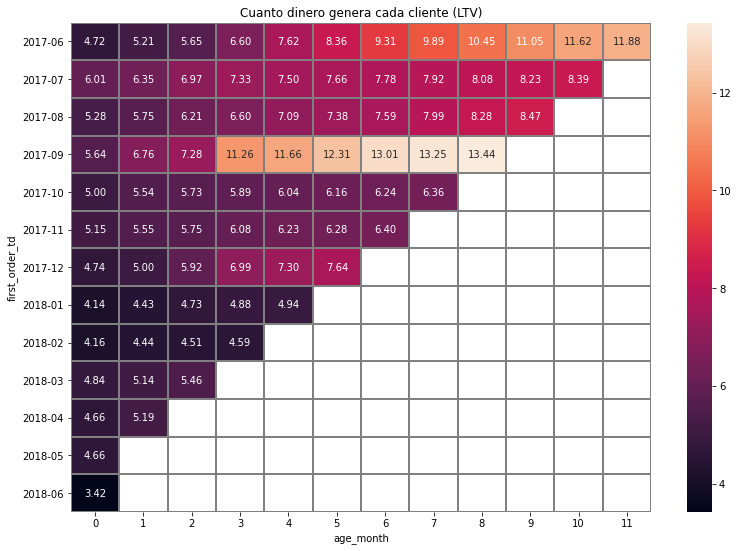

In [62]:
output= report.pivot_table(
    index='first_order_td',
    columns='age_month',
    values='ltv',
    aggfunc='mean'
    
).cumsum(axis=1)
plt.figure(figsize=(13, 9))
plt.title('Cuanto dinero genera cada cliente (LTV)')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)

- En el primer mes de cada cohorte el dinero promedio generado por cliente estuvo entre los 4.14 y 6.01 que el fue el mas alto, este corresponde a la cohorte del mes de julio.
- En la cohorte de Junio 2017 que ya tiene todo su ciclo completado cada cliente generó en promedio 11.88.
- Las cohortes de Junio, julio, agosto y septiembre son las que presentaron un mejor rendimiento.
- La cohorte con mejores números fue la de septiembre que en el mes 9 de su ciclo ya acumula 13.44 en promedio.


#### Conclusiones Ventas <a id='conclu_ventas'></a>

- La mayoría de los clientes realiza su primera compra el mismo día o en los primeros días que se registran en Y.Afisha y luego sus compras van disminuyendo drásticamente a lo largo del tiempo.
- En el ciclo de vida 0 las compras promedio por cliente van desde 1 a 1.18, siendo la mejor cohorte la de noviembre 2017 con 1.18.
- A partir del segundo mes las compras promedio bajan drásticamente y los valores van desde 0.05 a 0.09.
- La cohorte del mes de junio 2017 llega a su último mes con 0.04 por usuario.
- El tamaño promedio de la compra en el primer mes del ciclo de vida va desde 2.4 hasta 3.
- A partir del segundo mes las cohortes de Junio, Julio, Agosto y Septiembre de 2017 presentan aumentos en el tamaño promedio de la compra.
- Las cohortes de agosto y septiembre mantuvieron durante todo su ciclo de vida un tamaño promedio mayor a la de su primer mes.
- El tamaño promedio de compra mas alto se registró en la cohorte de septiembre a su cuarto mes.
- En el primer mes de cada cohorte el dinero promedio generado por cliente estuvo entre los 4.14 y 6.01 que el fue el mas alto, este corresponde a la cohorte del mes de julio.
- En la cohorte de Junio 2017 que ya tiene todo su ciclo completado cada cliente generó en promedio 11.88.
- Las cohortes de Junio, julio, agosto y septiembre son las que presentaron un mejor rendimiento.
- La cohorte con mejores números fue la de septiembre que en el mes 9 de su ciclo ya acumula 13.44 en promedio.


### Marketing <a id='marketing'></a>

In [63]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [64]:
# Cuanto dinero se gastó total/por fuente a lo largo del tiempo
costs['order_month'] = costs['dt'].astype('datetime64[M]')

<AxesSubplot:title={'center':'Total gastado por cada fuente en cada mes'}, xlabel='source_id', ylabel='order_month'>

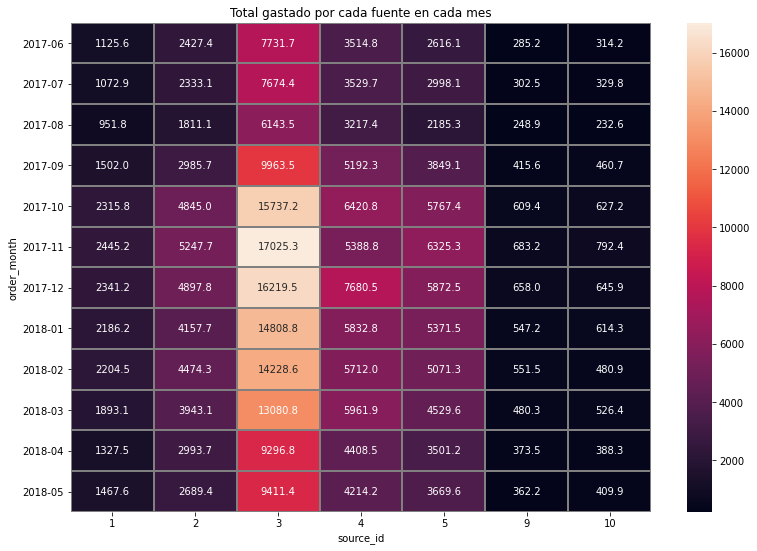

In [65]:
# Cuanto dinero se gastó total/por fuente a lo largo del tiempo
costs['order_month'].dt.strftime('%d.%m.%Y')
costs['order_month']= costs['order_month'].dt.strftime('%Y-%m')
costs_source= costs.groupby(['order_month','source_id'])['costs'].sum().reset_index()
costs_source_pivot= costs_source.pivot_table(
    index='order_month',
    columns= 'source_id',
    values= 'costs',
    aggfunc='mean'
)
output

plt.figure(figsize=(13, 9))
plt.title('Total gastado por cada fuente en cada mes')
sns.heatmap(
    costs_source_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

La fuente en la que más dinero se gastó fue la número 3 siendo el mes de noviembre donde se gastó más dinero 17025 dólares, las fuentes número 2, 4 y 5 tuvieron gastos medios y en la que se gastó menos fue en la número 10 que durante el mes de agosto solo se invirtieron 232 dólares.

In [66]:
# Costo de adquisición de clientes de cada una de las fuentes

visits = visits.rename(columns={"end_ts": "session_end_ts","start_ts": "session_start_ts"})
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')


In [67]:
visits_full = pd.merge(first_visits, visits, on = 'uid')
visits_full= visits_full.rename(columns={'first_session_month_x':'first_session_month'})
visits_full['age_months'] = ((visits_full['session_month'] - visits_full['first_session_month']) / np.timedelta64(1,'M')).round().astype('int')

In [68]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min','revenue':'sum'}).reset_index()
first_orders.columns = ['uid','first_order_ts','revenue']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

In [69]:
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - 
                                   buyers['first_session_start_ts']) / np.timedelta64(1,'D')).astype('int')

In [70]:
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]

In [71]:
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

In [72]:
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs']/costs_['n_buyers']
costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)

,cac
source_id,
1,9.49
2,16.29
3,15.58
4,7.27
5,8.34
9,6.84
10,6.56


- Las fuentes con menores costos son la número 10 con 6.56 y la número 9 con 6.84, mientras que las más costosas fueron la número 2 con 16.29 y la 3 con 15.58. 
- Las número 1, 4, y 5 tienen costos medios que van desde los 7.27 hasta 9.49.

In [73]:
orders=orders[['uid','order_month']]

In [74]:
buyers= pd.merge(buyers,orders, on='uid')

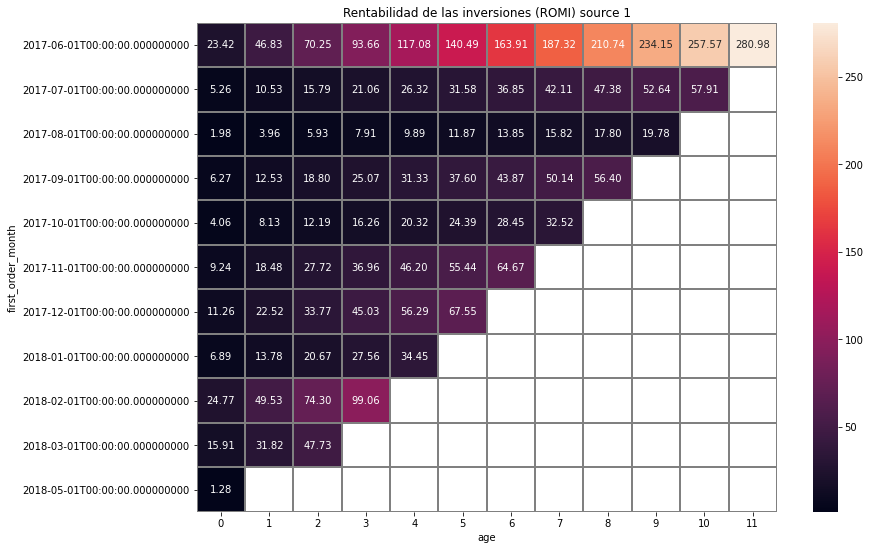

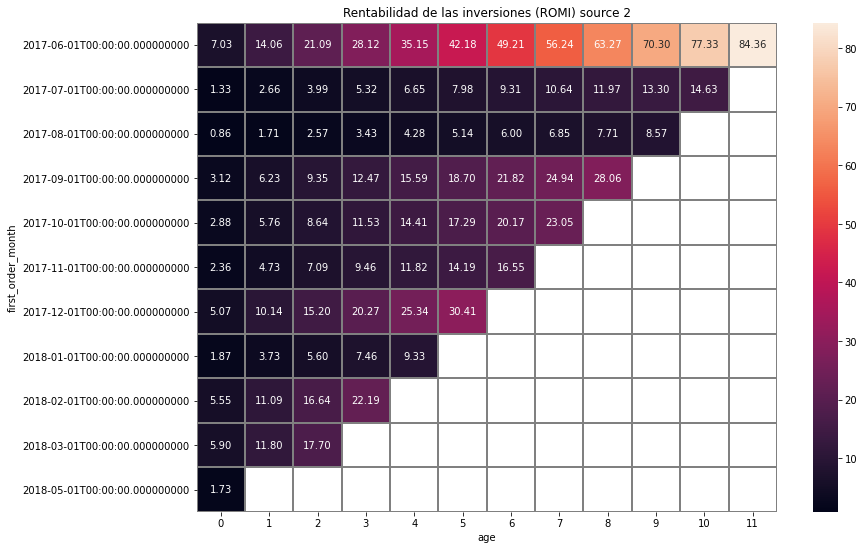

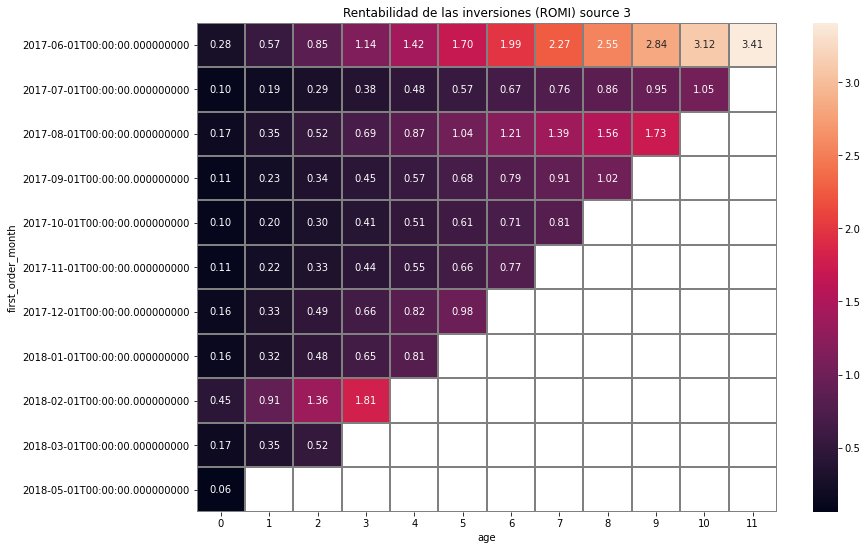

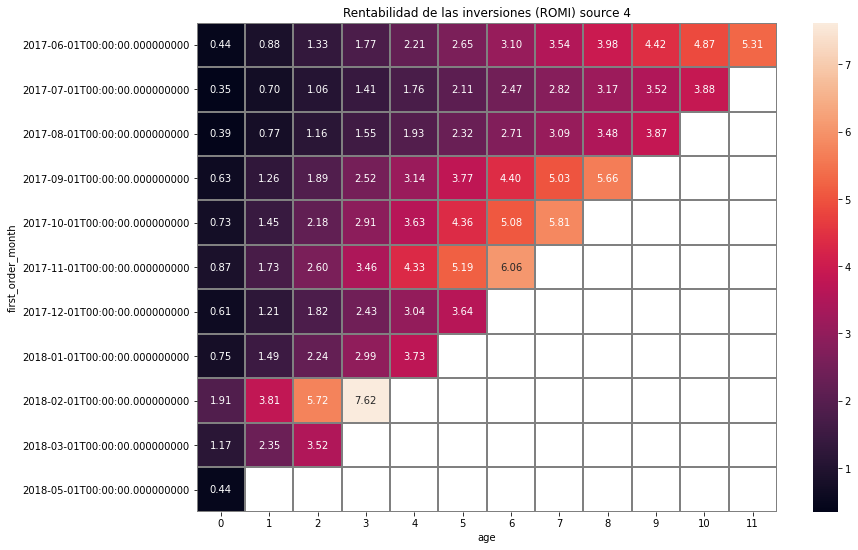

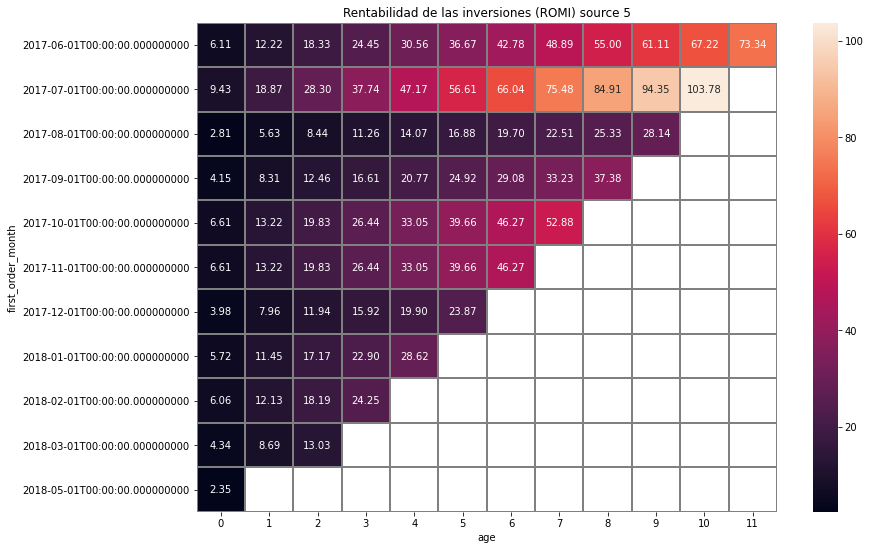

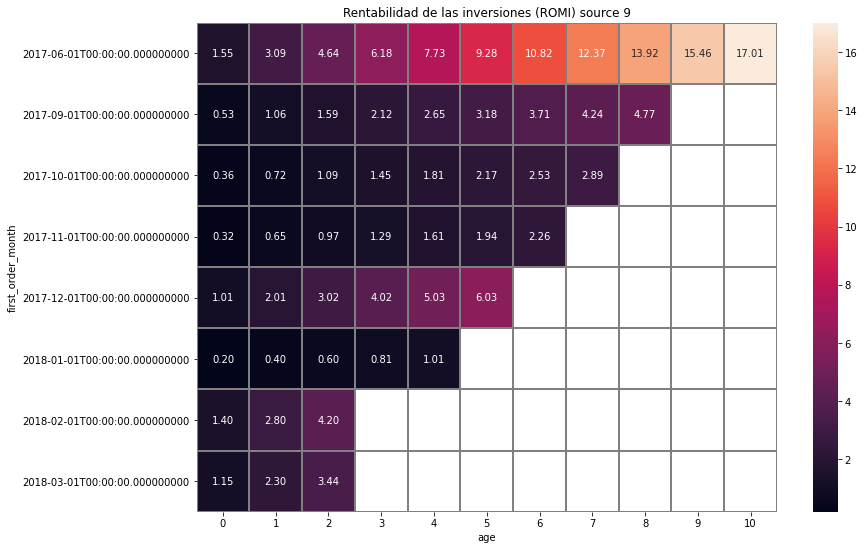

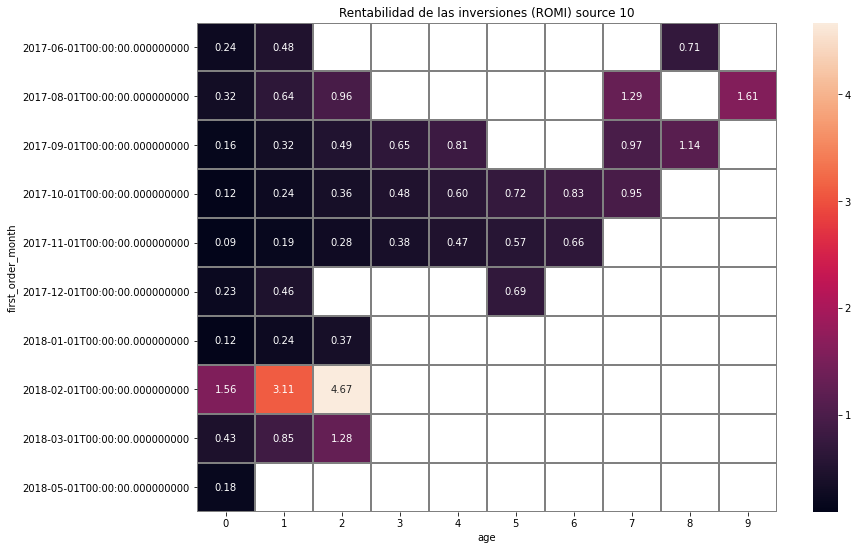

In [78]:
for source, df in buyers.groupby('source_id'):
    if source != 7 :
            cohort_sizes_t= (
                df.groupby(['source_id','first_order_dt'])
                .agg({'uid':'nunique'})
                .reset_index()
            )
            cohort_sizes_t.columns = ['source_id','first_order_month','n_buyers']
        
            cohorts_revenue_t= (
                df.groupby(['source_id','first_order_month','order_month'])
                .agg({'revenue':'sum'})
                .reset_index()
            )
            cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']
            report_romi= pd.merge(cohort_sizes_t,cohorts_revenue_t, on=['source_id','first_order_month'])
            report_romi['age'] = (
                report_romi['order_month'] - report_romi['first_order_month']
            ) / np.timedelta64(1, 'M')
            report_romi['age'] = report_romi['age'].round().astype('int')
        
            report_romi['ltv'] = report_romi['gp'].sum() / report_romi['n_buyers'].sum()
            costs= costs.groupby(['source_id','order_month']).agg({'costs':'sum'}).reset_index()
            costs['order_month']= costs['order_month'].astype('datetime64[M]')
            report_romi= pd.merge(report_romi, costs, left_on=['source_id','first_order_month'], right_on=['source_id','order_month'])
    
            report_romi.columns= ['source_id','first_order_month','n_buyers','order_month','gp','age','ltv','costs_month','costs']
            report_romi = report_romi.drop(['costs_month'], axis = 1) 
            report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
            report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
            romi= report_romi.pivot_table(
            index= 'first_order_month',
            columns= 'age',
            values= 'romi',
            aggfunc='mean'
            ).cumsum(axis=1).round(2)
            romi.fillna('')
            plt.figure(figsize=(13, 9))
            annot=True,
            plt.title(f'Rentabilidad de las inversiones (ROMI) source {source}')
            sns.heatmap(
            romi,
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor='gray',
            )


- La fuente más rentable fué la número 1 con ROMI en el ciclo 0 en todos los meses, con valores desde 1.28 en mayo de 2018 hasta su valor más alto en febrero 2018 con 24.77.
- La segunda fuente más rentable fue la número 5 con ROMI en el ciclo 0 en todos los meses, con valores desde 2.35 hasta 9.43.
- La tercera fuente más rentable fue la número 2 con Romi en casi todos sus meses desde el ciclo 0, solo en la cohorte del mes de agosto de 2017 no se recuperaron las inversiones en el ciclo 0, ya en ciclo 1 se recuperan las inversiones en todas las cohortes.
- Las fuentes que tuvieron un desempeño medio fueron las fuentes 4, 9.
- Las fuentes menos rentables fueron las número 3 con ROMI solo en algunas cohortes y en el último mes y la de peor desempeño es la número 10 con ROMI solo en algunas cohortes y durante todo el ciclo la recuperación es muy lenta. 

#### Conclusiones Marketing <a id='conclu_marketing'></a>

- La fuente en la que más dinero se gastó fue la número 3 siendo el mes de noviembre donde se gastó más dinero 17025 dólares, las fuentes número 2, 4 y 5 tuvieron gastos medios y en la que se gastó menos fue en la número 10 que durante el mes de agosto solo se invirtieron 232 dólares.
- Las fuentes con menores costos son la número 10 con 6.56 y la número 9 con 6.84, mientras que las más costosas fueron la número 2 con 16.29 y la 3 con 15.58. 
- Las número 1, 4, y 5 tienen costos medios que van desde los 7.27 hasta 9.49.
- La fuente más rentable fué la número 1 con ROMI en el ciclo 0 en todos los meses, con valores desde 1.28 en mayo de 2018 hasta su valor más alto en febrero 2018 con 24.77.
- La segunda fuente más rentable fue la número 5 con ROMI en el ciclo 0 en todos los meses, con valores desde 2.35 hasta 9.43.
- La tercera fuente más rentable fue la número 2 con Romi en casi todos sus meses desde el ciclo 0, solo en la cohorte del mes de agosto de 2017 no se recuperaron las inversiones en el ciclo 0, ya en ciclo 1 se recuperan las inversiones en todas las cohortes.
- Las fuentes que tuvieron un desempeño medio fueron las fuentes 4, 9.
- Las fuentes menos rentables fueron las número 3 con ROMI solo en algunas cohortes y en el último mes y la de peor desempeño es la número 10 con romi solo en algunas cohortes y durante todo el ciclo la recuperación es muy lenta. 

## Conclusiones generales <a id='general'></a>

El estudio se basó en la información de tres datasets que contenían información sobre las visitas y las compras que realizan los clientes a la plataforma de Y.Afisha y el tercer datasets contenía la información de los gastos de marketing realizados por la compañía, los registros de visitas y compras pertenecían al período entre junio 2017 a junio 2018, mientras que los registros de costos contenían información desde junio 2017 hasta mayo 2018 por lo que fue necesario hacer un slice de datos al combinar las tablas. 

Los datos no presentaban problemas significativos, no contaban con valores ausentes, ni duplicados, solo se ajustaron los tipos de datos de las columnas End Ts y Start Ts en la tabla visits, en la tabla orders se ajustó el tipo de datos de la columna Buy Ts, y en la tabla costs se ajustó el tipo de datos de la columna dt, en todos los casos a tipo de dato datetime, también fue necesario realizar en ajuste a los nombres de las columnas en las tablas visits y orders para que solo contengan letras minúsculas y quitar los espacios entre las palabras.

Verificando los máximos y mínimos de las columnas End Ts y Start Ts de la tabla visits vemos que el rango de fechas de estos datos van desde 2017-06-01 hasta 2018-05-31 pero en la columna End Ts hay 11 visitas con fecha 2018-06-01 que corresponden a inicios de sesiones del día 2018-05-31 que terminaron luego de las 00:00:00 y una sesión que terminó exactamente a las 00:00:00, ya que esta información es relavante para la información se conservan todos los datos. 

Se verificó el rango de fechas de los datos calculando el máximo y mínimo de la columna Buy Ts de la tabla orders y corresponden a las compras realizadas entre 2017-06-01 y el 2018-06-01, La compras realizada el 2018-06-01 corresponde a un inicio de sesión realizado el 2018-05-31 con Uid 83872787173869366, por lo tanto se conservan todos los datos.

 **Luego del análisis de los datos se puede concluir lo siguiente:**
 
**Productos**

1- Se determinó que la plataforma viene registrando ingresos constantes de usuarios únicos durante todo el mes, ya que al calcular número promedio de usuarios únicos diarios fue de 907 (DAU), mientras que el número promedio de usuarios únicos semanales (WAU) fue de 5621 y el promedio mensual (MAU) fue de 23228.

2- Se puede observar un incremento muy grande en los inicios de sesión en los días de fines de noviembre, una baja muy importante en los últimos días de marzo y el último día del mes de mayo aumentan los inicios de sesión.

4- Algunas personas se conectan mas de una vez ya que el promedio diario de inicios de sesión es de 987, mientras que el promedio por persona es de 1.08.

5- Se pudo determinar que para los dispositivos desktop en los meses de Junio, Julio y agosto de 2017 las visitas fueron mas bajas en comparación con el resto de los meses del año, estuvieron por debajo de las 10000, a partir de septiembre de 2017 las visitas fueron en aumento hasta tocar su punto mas alto en noviembre de 2017 con casi 25000 inicios de sesión, a partir de ahí los valores fueron bajando hasta mayo de 2018 con unos 15000 inicios de sesión. Se concluye que en los meses más calidos los ingresos a la plataforma disminuyen, mientras que en los meses más frios aumentan.

6- Se pudo determinar que para los dispositivos touch que en los meses de Junio, Julio y agosto de 2017 las visitas fueron mas bajas en comparación con el resto de los meses del año, estuvieron cercanos a los 4000, a partir de septiembre de 2017 los valores comienzan a aumentar y a partir de octubre de 2017 suben drasticamente hasta llegar a más de 8000 visitas y se mantiene bastante estables muy cercanos a ese número hasta marzo de 2018, en abril y mayo de 2018 se ubica entre las 6000 y 7000 visitas. Se concluye que en los meses más calidos los ingresos a la plataforma disminuyen, mientras que en los meses más frios aumentan

7- En la mayoría de los días los inicios de sesión por persona están en promedio entre 1.05 y 1.10, se observan algunos valores inusuales a finales de marzo de 2018 con un promedio que baja hasta 1 mientras que a finales de noviembre de 2017 hay una suba inusual por encima de 1.20 por persona.

8- Los mejores meses para la plataforma tomando en cuenta el dispositivo con el que ingresaron a la plataforma fueron Enero, febrero, marzo, octubre, noviembre y diciembre.

9- La mayor cantidad de ingresos se obtuvieron a través de dispositivos desktop con más de 20000 ingresos en los mejores meses y casi 10000 en los meses de mas bajo movimiento.

10- La duración promedio de una sesión es de 60 segundos. 

11- La frecuencia con la que los usuarios regresan en el segundo mes de su ciclo de vida se encuentra entre 4.2% (Cohorte Marzo) y 8.5%(Cohorte septiembre)

12- Todas las cohortes bajan su frecuencia a partir del tercer mes de su ciclo de vida.

13- La cohorte de junio llega a su ultimo mes de su ciclo de vida con 4.5%, buenos números en comparación con las otras cohortes

**Ventas**

1- Podemos concluir que la gran mayoría de clientes realiza su primera compra el mismo día o en los primeros días que se registran en Y.Afisha y luego sus compras van disminuyendo drásticamente a lo largo del tiempo.

2- En el ciclo de vida 0 las compras promedio por cliente van desde 1 a 1.18, siendo la mejor cohorte la de noviembre 2017 con 1.18.

3- A partir del segundo mes las compras promedio crecen ligeramente y se mantienen así durante todo el ciclo de vida.

4- La mejor cohorte es la del mes de junio 2017 que mantiene un crecimiento sostenido y mayor en compraración con las otras cohortes y llega a su último mes 2.19 acumulado.

5- El tamaño promedio de la compra en el primer mes del ciclo de vida va desde 2.4 hasta 3.

6- A partir del segundo mes las cohortes de Junio, Julio, Agosto y Septiembre de 2017 presentan aumentos en el tamaño promedio de la compra.

7- Las cohortes de agosto y septiembre mantuvieron durante todo su ciclo de vida un tamaño promedio mayor a la de su primer mes.

8- El tamaño promedio de compra mas alto se registró en la cohorte de septiembre a su cuarto mes.

9- En el primer mes de cada cohorte el dinero promedio generado por cliente estuvo entre los 4.14 y 6.01 que el fue el mas alto, este corresponde a la cohorte del mes de julio.

10- En la cohorte de Junio 2017 que ya tiene todo su ciclo completado cada cliente generó en promedio 11.88.

11- Las cohortes de Junio, julio, agosto y septiembre son las que presentaron un mejor rendimiento.

12- La cohorte con mejores números fue la de septiembre que en el mes 9 de su ciclo ya acumula 13.44 en promedio.


**Marketing**

1- La fuente en la que más dinero se gastó fue la número 3 siendo el mes de noviembre donde se gastó más dinero 17025 dólares, las fuentes número 2, 4 y 5 tuvieron gastos medios y en la que se gastó menos fue en la número 10 que durante el mes de agosto solo se invirtieron 232 dólares.

2- Las fuentes con menores costos son la número 10 con 6.56 y la número 9 con 6.84, mientras que las más costosas fueron la número 2 con 16.29 y la 3 con 15.58. 

3- Las número 1, 4, y 5 tienen costos medios que van desde los 7.27 hasta 9.49.

4- La fuente más rentable fué la número 1 con ROMI en el ciclo 0 en todos los meses, con valores desde 1.28 en mayo de 2018 hasta su valor más alto en febrero 2018 con 24.77.

5- La segunda fuente más rentable fue la número 5 con ROMI en el ciclo 0 en todos los meses, con valores desde 2.35 hasta 9.43.

6- La tercera fuente más rentable fue la número 2 con Romi en casi todos sus meses desde el ciclo 0, solo en la cohorte del mes de agosto de 2017 no se recuperaron las inversiones en el ciclo 0, ya en ciclo 1 se recuperan las inversiones en todas las cohortes.

7- Las fuentes que tuvieron un desempeño medio fueron las fuentes 4, 9.

8- Las fuentes menos rentables fueron las número 3 con ROMI solo en algunas cohortes y en el último mes y la de peor desempeño es la número 10 con ROMI solo en algunas cohortes y durante todo el ciclo la recuperación es muy lenta. 

## Recomendaciones <a id='recomendaciones'></a>

1- Ya que los inicios de sesión en la plataforma los meses de junio, julio y agosto son bastante bajos es necesario enfocar los anuncios por publicidad en estos meses para incrementar las visitas a la plataforma. 

2- El tiempo promedio que pasan las personas es bajo solo 60 segundos por lo que es necesario facilitar al máximo el procedimiento de compra para que los usuarios no abandonen la plataforma antes de comprar. 

3- La frecuencia con la que los usuarios regresan es bajo a partir del segundo mes, los clientes realizan la mayoría de las compras al poco tiempo de ingresar la primera vez y después estos clientes se pierden con el pasar de los meses, por lo que es necesario enforcar la publicidad en los clientes ya existentes para fidelizarlos.

4- El costo de adquisición de clientes es un poco elevado en la fuentes 2 y 3, pero la 3 no da buenos resultados, es mejor invertir en las fuentes 1 y 5 cuya recuperación sucede desde el ciclo 0. 

5- La cantidad de personas que ingresan con dispositivos touch es bastante menor a los que ingresan con dispositivos desktop, es necesario verificar que la plataforma esté funcionando correctamente en los dispositivos touch ya que se pueden estar perdiendo una gran cantidad de clientes.